In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
# Generate synthetic time series data
def generate_synthetic_data(timesteps):
    time = np.arange(timesteps)
    data = np.sin(0.1 * time) + np.random.normal(0, 0.1, timesteps)  # Sine wave with noise
    return data

In [ ]:
# Prepare the dataset
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step)]
        X.append(a)
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [ ]:
# Main code
timesteps = 1000
data = generate_synthetic_data(timesteps)
data = data.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create dataset
X, y = create_dataset(data_scaled, time_step=10)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1356
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0293
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0246
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0205
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054
Epoch 16/50
31/

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


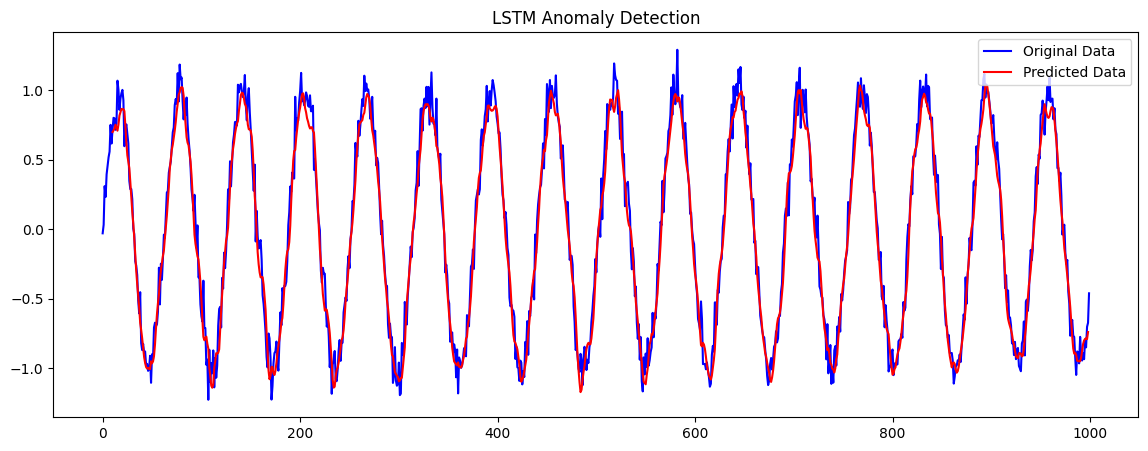

In [ ]:
# Predicting and identifying anomalies
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)  # Inverse transform to original scale

# Plot the results
plt.figure(figsize=(14,5))
plt.plot(data, label='Original Data', color='blue')
plt.plot(np.arange(10, len(predicted) + 10), predicted, label='Predicted Data', color='red')
plt.title('LSTM Anomaly Detection')
plt.legend()
plt.show()

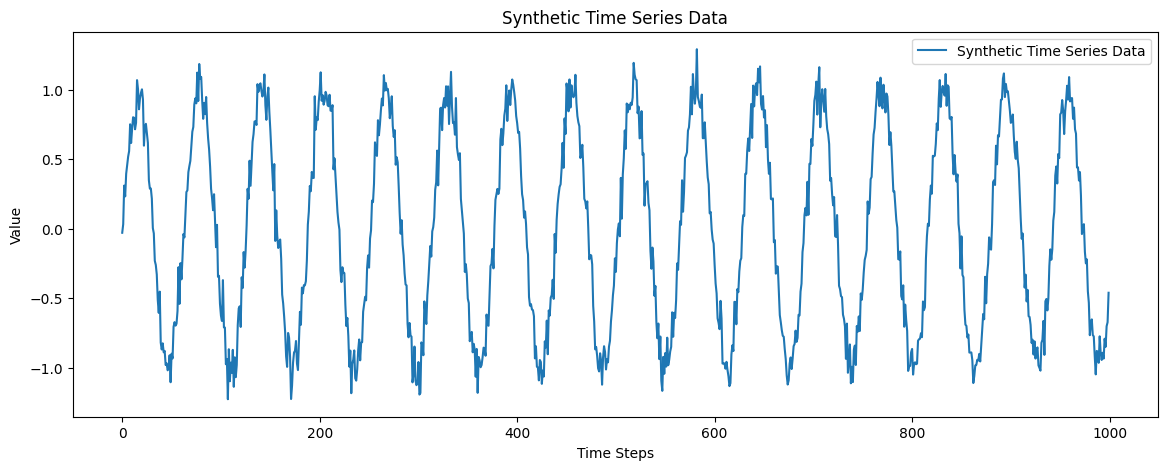

count    1000.000000
mean       -0.000063
std         0.714349
min        -1.226825
25%        -0.688196
50%         0.009433
75%         0.699691
max         1.291149
dtype: float64


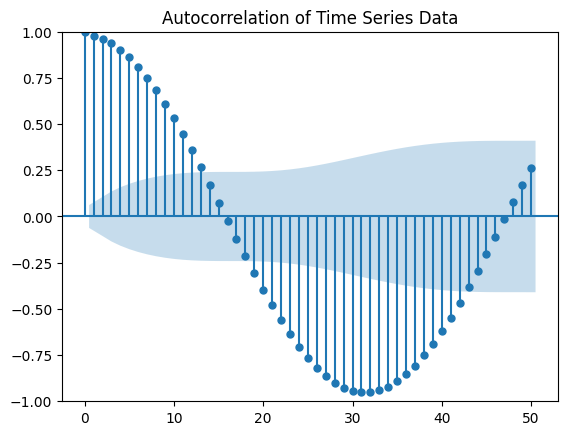

In [ ]:
import seaborn as sns

# Visualize the synthetic data
plt.figure(figsize=(14, 5))
plt.plot(data, label='Synthetic Time Series Data')
plt.title('Synthetic Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

# Summary statistics
print(pd.Series(data.flatten()).describe())

# Check for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data, lags=50)
plt.title('Autocorrelation of Time Series Data')
plt.show()

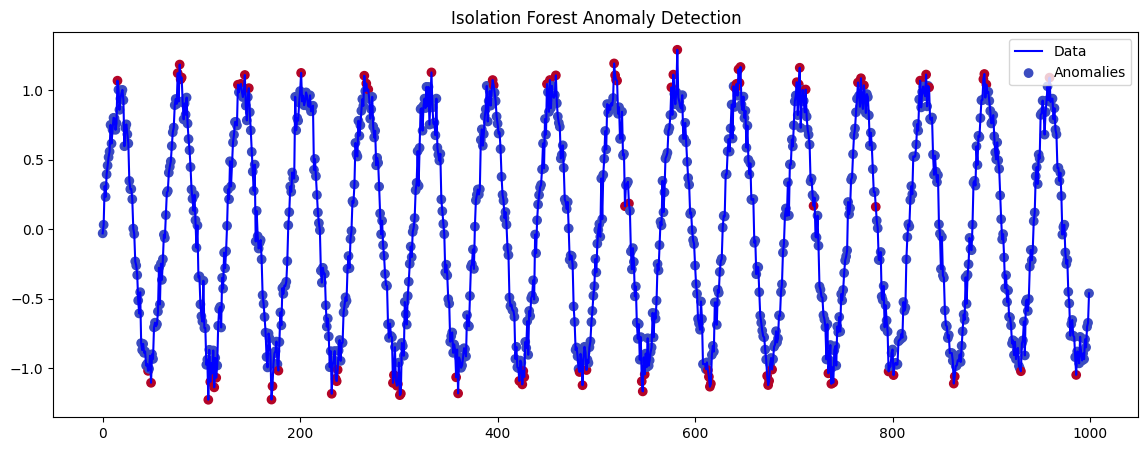

In [ ]:
from sklearn.ensemble import IsolationForest

# Flatten data for Isolation Forest
data_flattened = data.flatten()
model_if = IsolationForest(contamination=0.1)  # Adjust contamination as needed
model_if.fit(data_flattened.reshape(-1, 1))

# Predict anomalies
anomalies_if = model_if.predict(data_flattened.reshape(-1, 1))
anomalies_if = np.where(anomalies_if == -1, 1, 0)  # Convert to binary

# Visualize anomalies
plt.figure(figsize=(14, 5))
plt.plot(data_flattened, label='Data', color='blue')
plt.scatter(np.arange(len(data_flattened)), data_flattened, c=anomalies_if, cmap='coolwarm', label='Anomalies')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.show()

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
df_prophet = pd.DataFrame({'ds': pd.date_range(start='2022-01-01', periods=len(data), freq='D'),
                            'y': data.flatten()})

# Fit Prophet model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Create future dataframe and make predictions
future = model_prophet.make_future_dataframe(periods=0)  # No additional future periods
forecast = model_prophet.predict(future)

# Extract the predicted values
predicted_prophet = forecast['yhat'].values

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuzsa88k/rhzb0cpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuzsa88k/don6p_m4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13010', 'data', 'file=/tmp/tmpsuzsa88k/rhzb0cpt.json', 'init=/tmp/tmpsuzsa88k/don6p_m4.json', 'output', 'file=/tmp/tmpsuzsa88k/prophet_model_o5y9k3_/prophet_model-20250205113834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:38:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:38:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


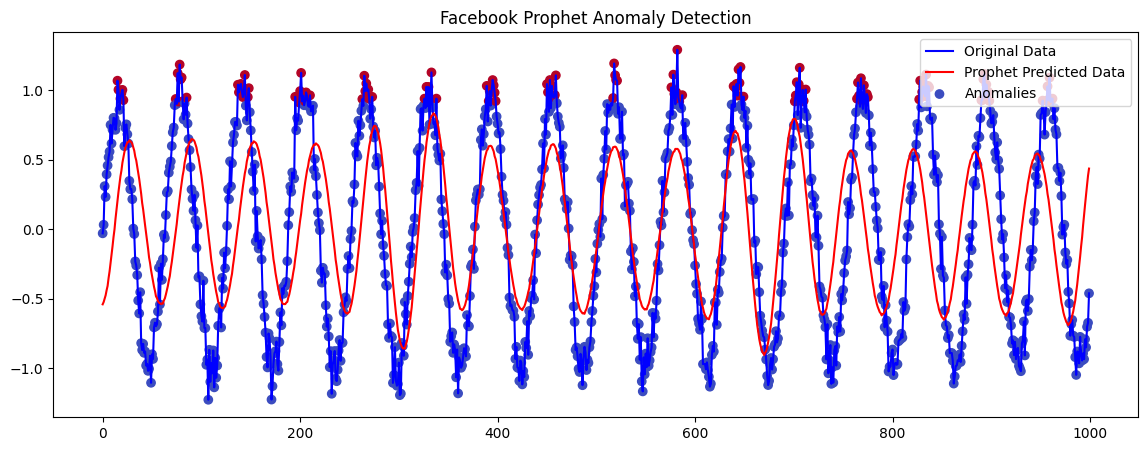

In [ ]:
# Define a threshold (e.g., mean + 2 standard deviations)
threshold = np.mean(predicted_prophet) + 2 * np.std(predicted_prophet)

# Identify anomalies
anomalies_prophet = np.where(data.flatten() > threshold, 1, 0)

# Visualize the results
plt.figure(figsize=(14, 5))
plt.plot(data.flatten(), label='Original Data', color='blue')
plt.plot(predicted_prophet, label='Prophet Predicted Data', color='red')
plt.scatter(np.arange(len(data.flatten())), data.flatten(), c=anomalies_prophet, cmap='coolwarm', label='Anomalies')
plt.title('Facebook Prophet Anomaly Detection')
plt.legend()
plt.show()

In [ ]:
# Assuming you want to artificially create some anomalies for evaluation
np.random.seed(42)  # For reproducibility
num_anomalies = 20  # Number of anomalies you want to introduce

# Randomly select indices for anomalies
some_indices = np.random.choice(len(data.flatten()), num_anomalies, replace=False)

# Create true anomaly labels (1 for anomaly, 0 for normal)
true_anomalies = np.zeros_like(data.flatten())
true_anomalies[some_indices] = 1  # Mark the randomly selected indices as anomalies


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# LSTM predictions are made on sequences, so they will be shorter than the original data
# Adjust the length of true_anomalies to match predictions
lstm_anomalies = np.zeros_like(data.flatten())  # Initialize with zeros
lstm_anomalies[10:10 + len(predicted.flatten())] = np.where(predicted.flatten() > threshold, 1, 0)

# Evaluate LSTM
print('LSTM Classification Report:')
print(classification_report(true_anomalies, lstm_anomalies))

# Evaluate Facebook Prophet
prophet_anomalies = np.where(data.flatten() > threshold, 1, 0)  # Define a threshold for Prophet predictions
print('Facebook Prophet Classification Report:')
print(classification_report(true_anomalies, prophet_anomalies))

# Evaluate Isolation Forest
print('Isolation Forest Classification Report:')
print(classification_report(true_anomalies, anomalies_if))


LSTM Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       980
         1.0       0.02      0.05      0.02        20

    accuracy                           0.92      1000
   macro avg       0.50      0.49      0.49      1000
weighted avg       0.96      0.92      0.94      1000

Facebook Prophet Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92       980
         1.0       0.02      0.10      0.03        20

    accuracy                           0.85      1000
   macro avg       0.50      0.49      0.47      1000
weighted avg       0.96      0.85      0.90      1000

Isolation Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       980
         1.0       0.04      0.20      0.07        20

    accuracy                           0.89      1000
   macro avg       0